In [1]:
#Load packages
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib.pyplot import plot, show, savefig, xlim, figure, \
                ylim, legend, boxplot, setp, axes
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,OrdinalEncoder,LabelBinarizer
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Importing the first dataset
df = pd.read_csv ("../input/protein-data-set/pdb_data_no_dups.csv")
df.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0


In [3]:
# Importing the second dataset
df1 = pd.read_csv ("../input/protein-data-set/pdb_data_seq.csv")
df1.head()

,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,A,CGCGAATTCGCG,24,DNA
3,101D,B,CGCGAATTCGCG,24,DNA
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


In [4]:
# Merging the two datasets
df2 = df.set_index('structureId').merge(df1.set_index('structureId'),on='structureId',how='left')
df2.head()


,classification,experimentalTechnique,macromoleculeType_x,residueCount_x,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence,residueCount_y,macromoleculeType_y
structureId,,,,,,,,,,,,,,,,,
100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,A,CCGGCGCCGG,20.0,DNA/RNA Hybrid
100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,B,CCGGCGCCGG,20.0,DNA/RNA Hybrid
101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0,A,CGCGAATTCGCG,24.0,DNA
101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0,B,CGCGAATTCGCG,24.0,DNA
101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154.0,Protein


In [5]:
# Understanding the dataset a bit better
print(df2.describe())
print(" The shape of the protein dataset is: " +str(df2.shape))
# So we have > 400,000 observations (rows) and 17 features (columns)

       residueCount_x     resolution  structureMolecularWeight  \
count   471811.000000  449845.000000              4.718110e+05   
mean      6249.411993       3.020053              9.249303e+05   
std      23602.912835       3.090108              3.016951e+06   
min          0.000000       0.480000              3.143800e+02   
25%        456.000000       2.000000              5.261474e+04   
50%       1140.000000       2.500000              1.308344e+05   
75%       4518.000000       3.100000              6.331348e+05   
max     313236.000000      70.000000              9.773054e+07   

       crystallizationTempK  densityMatthews  densityPercentSol  \
count         317806.000000    390156.000000      390278.000000   
mean             290.882456         2.850614          54.196381   
std                8.903673         0.824283          10.269266   
min                4.000000         0.000000           0.000000   
25%              291.000000         2.320000          46.890000   
50%

# Data Cleaning

In [6]:
# Data Cleaning - Summing NA values per column
print(df2.isnull().sum())

classification                   4
experimentalTechnique            0
macromoleculeType_x          36432
residueCount_x                   0
resolution                   21966
structureMolecularWeight         0
crystallizationMethod       156948
crystallizationTempK        154005
densityMatthews              81655
densityPercentSol            81533
pdbxDetails                  86147
phValue                     130910
publicationYear              57780
chainId                        672
sequence                       690
residueCount_y                 662
macromoleculeType_y          36432
dtype: int64


In [7]:
# Drop unwanted columns(not relevant for our model)
df3 = df2.drop(['publicationYear', 'chainId','macromoleculeType_x', 'macromoleculeType_y'], axis = 1)
df3.shape

(471811, 13)

In [8]:
# Drop na observations
df_new=df3.dropna(how='any')
print(df_new.isnull().sum())

classification              0
experimentalTechnique       0
residueCount_x              0
resolution                  0
structureMolecularWeight    0
crystallizationMethod       0
crystallizationTempK        0
densityMatthews             0
densityPercentSol           0
pdbxDetails                 0
phValue                     0
sequence                    0
residueCount_y              0
dtype: int64


<AxesSubplot:>

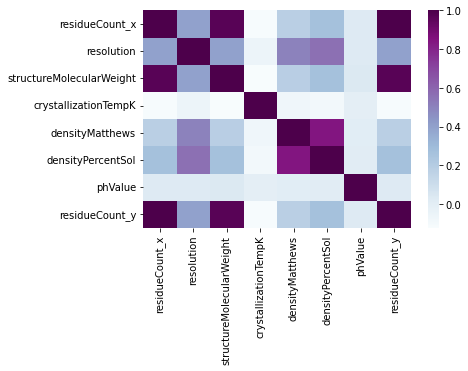

In [9]:
# Making a correlation plot
sns.heatmap(df_new.corr(), cmap='BuPu')

(264224, 10)

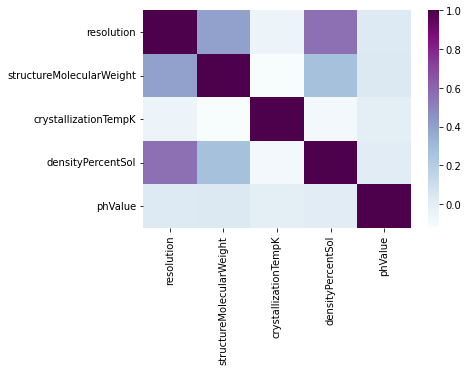

In [10]:
# Removing correlated features: residueCount and densityMatthews
df4 = df_new.drop(['residueCount_x', 'residueCount_y','densityMatthews'],axis=1)
# Making the new heatmap now
sns.heatmap(df4.corr(),cmap='BuPu')
df4.shape

# Data Preprocessing

2762


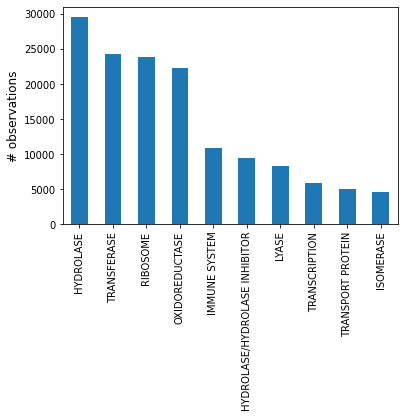

In [11]:
# Plot the 10 most common families of proteins
df4['classification'].value_counts()[:10].plot(kind='bar')
#plt.xticks(rotation=45)
#plt.title("Top 10 most common protein families")
plt.ylabel("# observations", fontsize = 12)
#plt.xlabel("Protein Families", fontsize = 12)
print(df4.classification.nunique())

In [12]:
df_1 = df4['classification'].value_counts()[:10]
print(df_1)

HYDROLASE                        29559
TRANSFERASE                      24236
RIBOSOME                         23858
OXIDOREDUCTASE                   22287
IMMUNE SYSTEM                    10876
HYDROLASE/HYDROLASE INHIBITOR     9387
LYASE                             8354
TRANSCRIPTION                     5890
TRANSPORT PROTEIN                 5010
ISOMERASE                         4624
Name: classification, dtype: int64


In [13]:
# Selecting families with count > 15000
counts = df4.classification.value_counts()
class_data = np.asarray(counts[(counts > 15000)].index)
class_data = df4[df4.classification.isin(class_data)]
# Checking new dataframe for top protein family names
class_data.classification.value_counts()

HYDROLASE         29559
TRANSFERASE       24236
RIBOSOME          23858
OXIDOREDUCTASE    22287
Name: classification, dtype: int64

In [14]:
# Checking the size of new dataframe (essentially down to 25% of original data)
class_data.shape

(99940, 10)

In [15]:
class_data.dtypes

classification               object
experimentalTechnique        object
resolution                  float64
structureMolecularWeight    float64
crystallizationMethod        object
crystallizationTempK        float64
densityPercentSol           float64
pdbxDetails                  object
phValue                     float64
sequence                     object
dtype: object

In [16]:
# Converting all the categorical features to numerical
cat_transformer = OrdinalEncoder()
cat_features = ['crystallizationMethod', 'experimentalTechnique','pdbxDetails','sequence', 'classification']
transformed_cat = cat_transformer.fit_transform(class_data[cat_features])
class_data[cat_features] = transformed_cat
class_data.head(10)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,classification,experimentalTechnique,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityPercentSol,pdbxDetails,phValue,sequence
structureId,,,,,,,,,,
1A72,1.0,4.0,2.60,40658.50,119.0,277.0,46.82,18151.0,8.40,19585.0
1AR4,1.0,4.0,1.90,45428.53,191.0,277.0,32.00,22390.0,6.10,1616.0
1AR4,1.0,4.0,1.90,45428.53,191.0,277.0,32.00,22390.0,6.10,1616.0
1AR5,1.0,4.0,1.60,45430.34,191.0,277.0,32.20,22394.0,6.15,1616.0
1AR5,1.0,4.0,1.60,45430.34,191.0,277.0,32.20,22394.0,6.15,1616.0
1AUE,3.0,4.0,2.33,24203.73,119.0,277.0,45.00,18510.0,8.00,2174.0
1AUE,3.0,4.0,2.33,24203.73,119.0,277.0,45.00,18510.0,8.00,2174.0
1AUK,0.0,4.0,2.10,52423.45,119.0,291.0,63.00,22391.0,5.40,17964.0
1AVM,1.0,4.0,1.55,45514.38,222.0,277.0,31.70,18467.0,6.15,1616.0


# EDA

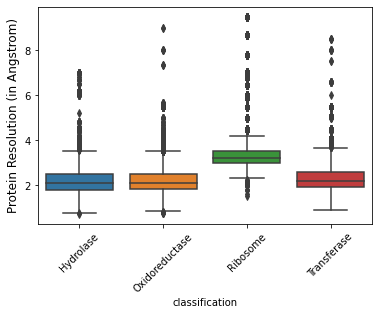

In [17]:
# Boxplot for visualizing the resolution feature
sns.boxplot(x=class_data["classification"], y=class_data["resolution"], data=pd.melt(class_data))
plt.ylabel("Protein Resolution (in Angstrom)", fontsize = 12)
#plt.xlabel("Protein Family", fontsize = 12)
#plt.yticks([0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000], ["0", "1", "2", "3", "4", "5", "6", "7", "8"])
plt.xticks([0, 1, 2, 3], ["Hydrolase","Oxidoreductase", "Ribosome", "Transferase"], rotation = 45)
plt.show()

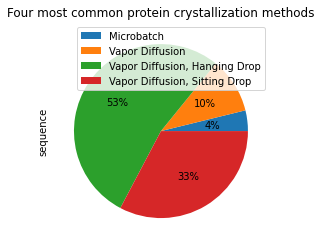

In [18]:
# Pie Chart for visualizing the top 4 most common protein crystallization methods
count = class_data.crystallizationMethod.value_counts(ascending = False)
top_count = np.asarray(count[(count > 1500)].index)
top_CM = class_data[class_data.crystallizationMethod.isin(top_count)]
fig = top_CM.groupby(['crystallizationMethod']).sum().plot(kind='pie', y = 'sequence' , autopct='%1.0f%%', labels = None)
plt.title("Four most common protein crystallization methods")
plt.legend(labels = ["Microbatch", "Vapor Diffusion", "Vapor Diffusion, Hanging Drop", "Vapor Diffusion, Sitting Drop"], loc = 1)

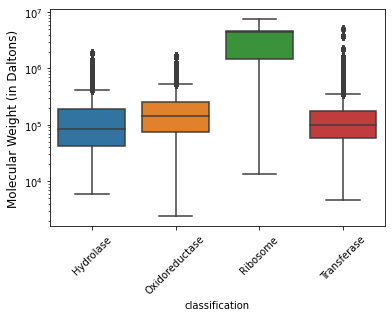

In [19]:
# Comparing the molecular weights of the top 4 protein families using a boxplot
ax = sns.boxplot(x=class_data["classification"], y=class_data["structureMolecularWeight"], data=pd.melt(class_data))
ax.set_yscale('log')
plt.ylabel("Molecular Weight (in Daltons)", fontsize = 12)
#plt.xlabel("Protein Family")
plt.xticks([0, 1, 2, 3], ["Hydrolase","Oxidoreductase", "Ribosome", "Transferase"], rotation = 45)
#plt.yticks([0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000], ["0", "1", "2", "3", "4", "5", "6", "7", "8"])
plt.show()

# Building KNN model w/ feature selection

Manual feature selection based on EDA, intuition, and domain knowledge was performed on the ‘clean protein dataset’ to bring the number of the feature inputs down to 5 – structure molecular weight, pH, crystallization method, crystallization temperature, and sequence.

In [20]:
# Build a classification model for this new dataframe (top 3 protein families)
# Scale y ?
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()
X = class_data.drop(['classification', 'experimentalTechnique','pdbxDetails', "resolution", "densityPercentSol"],axis=1) 
y = class_data.classification # Classes: 0-3
X_minmax = min_max_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.2, random_state=42)# are these good options?
print(X.columns)

Index(['structureMolecularWeight', 'crystallizationMethod',
       'crystallizationTempK', 'phValue', 'sequence'],
      dtype='object')


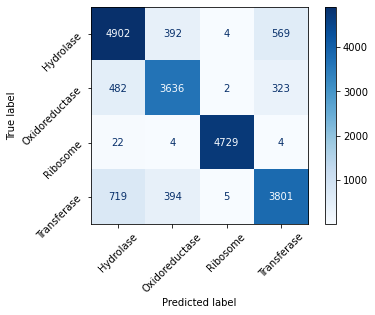

                precision    recall  f1-score   support

     Hydrolase       0.80      0.84      0.82      5867
Oxidoreductase       0.82      0.82      0.82      4443
      Ribosome       1.00      0.99      1.00      4759
   Transferase       0.81      0.77      0.79      4919

      accuracy                           0.85     19988
     macro avg       0.86      0.86      0.86     19988
  weighted avg       0.85      0.85      0.85     19988



In [21]:
# Building model w/ K=5 since it is the most commomly used K value
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Assessing the initial knn model's performance
y_pred = knn.predict(X_test)
#score = metrics.accuracy_score(y_test, y_pred)
#print("knn model accuracy: %0.3f" % score)

plot_confusion_matrix(knn,X_test,y_test,cmap=plt.cm.Blues, values_format = '.5g', display_labels = ["Hydrolase","Oxidoreductase", "Ribosome", "Transferase"])
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

print(classification_report(y_test, y_pred, target_names=["Hydrolase","Oxidoreductase", "Ribosome", "Transferase"]))

The average structure molecular weight of the Ribosome proteins is ~20x higher than that of the other families. Additionally, Ribosome is the only class of proteins that does not have any outliers in the molecular weight column. Therefore, it is easier for the model to correctly classify proteins belonging to the Ribosome family.

In [22]:
# Usig GridSearchCV to find the best k values
import time
knn = KNeighborsClassifier()
begin_knn = time.time()
params = {'n_neighbors': np.arange(1,25,1) }
clf = GridSearchCV(knn, params, cv=10)
clf.fit(X_train,y_train)
end_knn = time.time()
print(clf.best_score_)
# total time taken
print(f"Total runtime of the knn program is {end_knn - begin_knn} seconds")

0.93741244293191
Total runtime of the knn program is 199.0766315460205 seconds


In [23]:
# Find the best k parameter
print("The best k parameter is : " + str(clf.best_params_))
print("Accuracy: " + str(clf.best_estimator_.score(X_test, y_test)))

The best k parameter is : {'n_neighbors': 1}
Accuracy: 0.947518511106664


Text(0, 0.5, 'Mean Error')

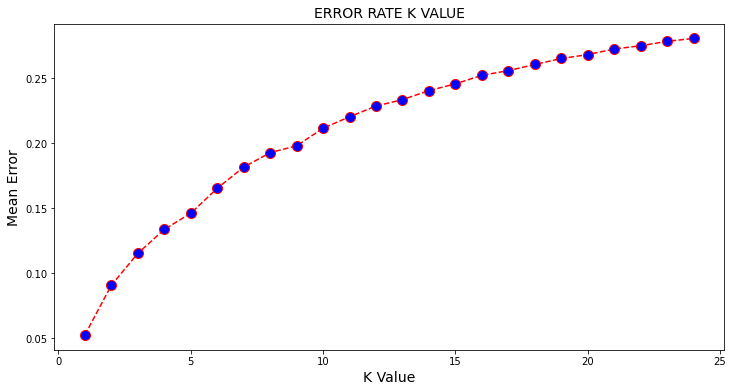

In [24]:
# Calculating error for K values between 1 and 25
error = []
for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 25), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('ERROR RATE K VALUE',fontsize = 14 )
plt.xlabel('K Value', fontsize = 14 )
plt.ylabel('Mean Error', fontsize = 14 )

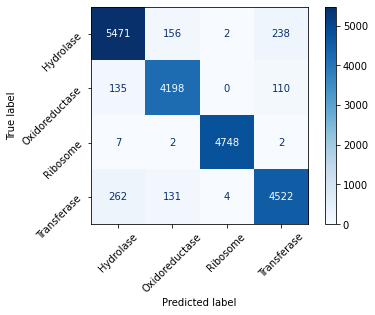

                precision    recall  f1-score   support

     Hydrolase       0.93      0.93      0.93      5867
Oxidoreductase       0.94      0.94      0.94      4443
      Ribosome       1.00      1.00      1.00      4759
   Transferase       0.93      0.92      0.92      4919

      accuracy                           0.95     19988
     macro avg       0.95      0.95      0.95     19988
  weighted avg       0.95      0.95      0.95     19988



In [25]:
# Based on the above graph, K=1 gives us the lowest mean error (5 features finally!)
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
plot_confusion_matrix(knn1,X_test,y_test,cmap=plt.cm.Blues,values_format = '.5g', display_labels = ["Hydrolase","Oxidoreductase", "Ribosome", "Transferase"])
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


# Assessing the initial knn model's performance
y_pred = knn1.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Hydrolase","Oxidoreductase", "Ribosome", "Transferase"]))

This project presents an accurate protein classification prediction method using a machine-learning approach based on protein physiochemical properties. In this project, I was able to identify a compact and useful feature subset for predicting the families (and hence the function) of four different classes of proteins. K hyperparameter tuning improved my KNN model’s performance as the classification accuracy rose from 85% to 95% for K = 1 and n_features = 5.